In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\test.csv
dataset\train.csv
dataset\train_data_dict.csv


In [69]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [70]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [71]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# Import the relevat modules

In [73]:
# Standard ML Models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


In [74]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [75]:


# train_data['Bed Grade'].fillna(-999, inplace = True) 
# test_data['Bed Grade'].fillna(-999, inplace = True) 

train_data['Bed Grade'].fillna(0, inplace = True) 
test_data['Bed Grade'].fillna(0, inplace = True) 


train_data['City_Code_Patient'].fillna(-999., inplace = True) 
test_data['City_Code_Patient'].fillna(-999., inplace = True) 


print(train_data['City_Code_Patient'].unique())


train_data['Bed Grade'].unique() 

[   7.    8.    2.    5.    6.    3.    4.    1.    9.   14. -999.   25.
   15.   12.   10.   28.   24.   23.   20.   11.   13.   21.   18.   16.
   26.   27.   22.   19.   31.   34.   32.   30.   29.   37.   33.   35.
   36.   38.]


array([2., 3., 4., 1., 0.])

In [76]:
train_data.isnull()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Create the Correlation Graph 

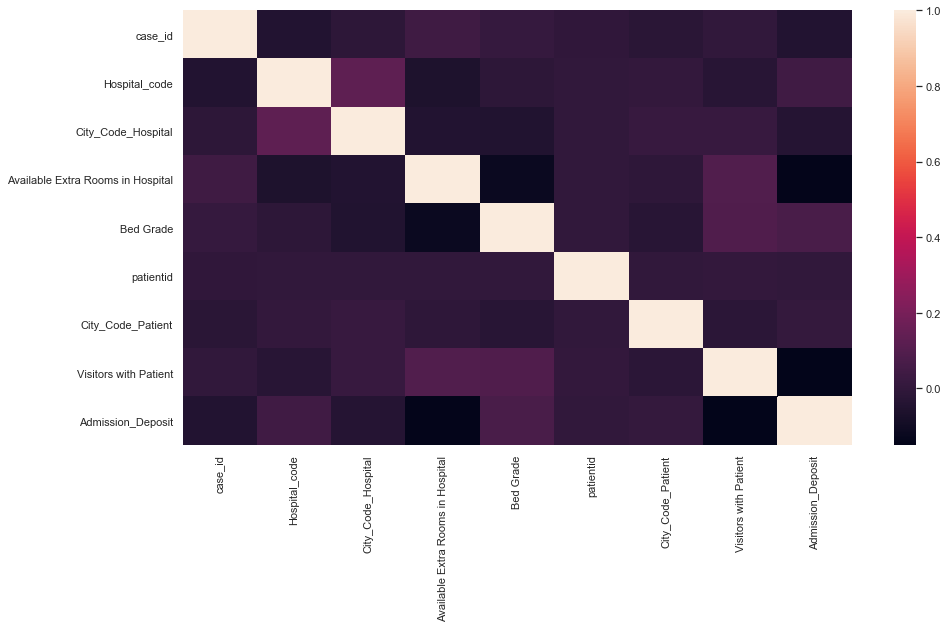

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

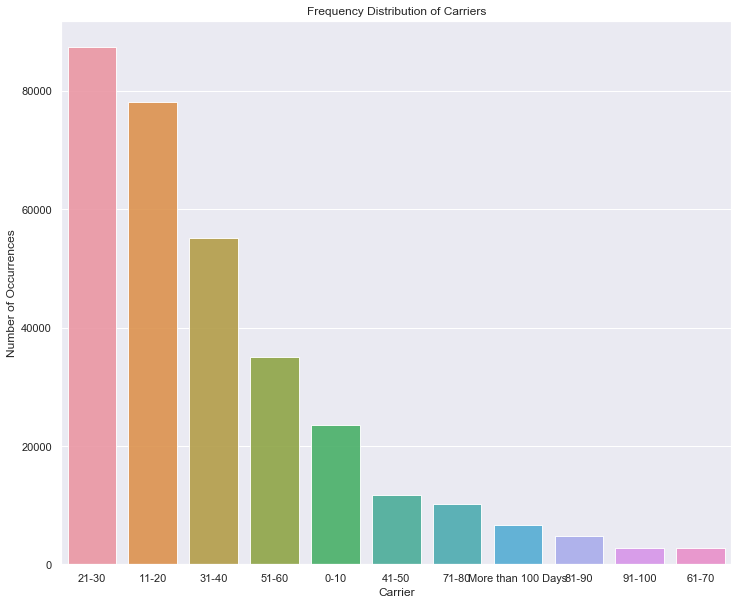

<Figure size 1440x576 with 0 Axes>

In [78]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Dealing with Categorical Data

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

# Creating a Base Line Model

In [80]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                    'Severity of Illness','Age','Stay']

cat_features_test = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                    'Severity of Illness','Age']
encoder = LabelEncoder()

# Apply the label encoder to each column
train_data_transform = train_data[cat_features].apply(encoder.fit_transform)
test_data_transform = test_data[cat_features_test].apply(encoder.fit_transform)

In [81]:
# ['case_id', 'Hospital_code', 'City_Code_Hospital',
#        'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
#        'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
#        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','City_Code_Patient',
#        'Age','Stay']

train_data_transformed=train_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(train_data_transform)

test_data_transformed=test_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(test_data_transform)

train_data_transformed=train_data_transformed[[ 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code', 'Department', 'Ward_Type','City_Code_Patient',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age','Stay']]  #'case_id','patientid','Hospital_region_code'


test_data_transformed=test_data_transformed[[  'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade',  'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code',  'Department', 'Ward_Type','City_Code_Patient',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age']] #'case_id','patientid','Hospital_region_code'

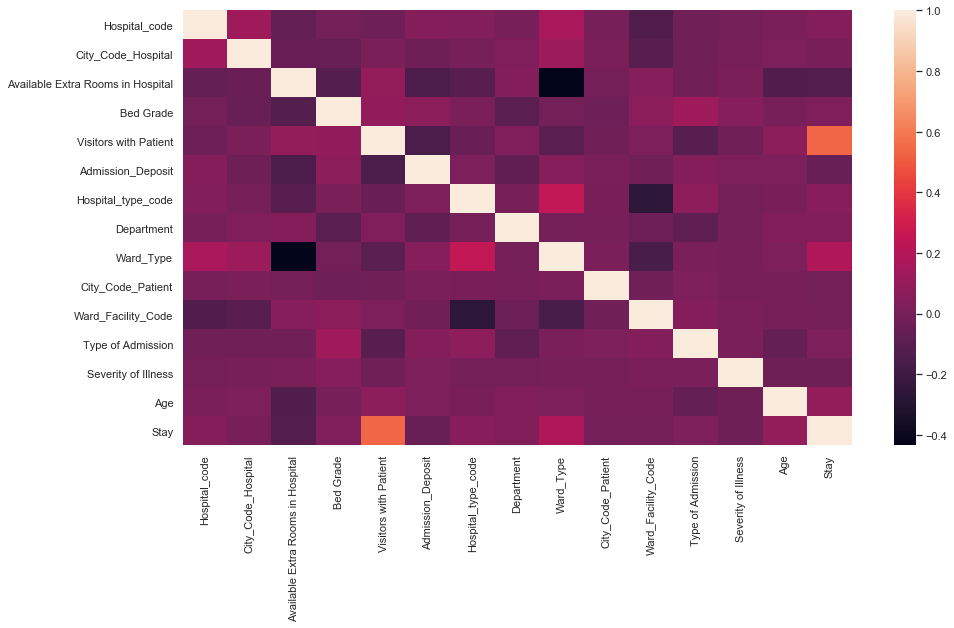

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_transformed.corr())

In [83]:
train_data_transformed.describe()


,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Hospital_type_code,Department,Ward_Type,City_Code_Patient,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,18.318841,4.771717,3.197627,2.624875,3.284099,4880.749392,1.256841,1.943779,1.888575,-7.069087,3.286913,0.782768,1.374076,4.127777,2.698550
std,8.633755,3.102535,1.168171,0.874391,1.764061,1086.776254,1.535712,0.561245,0.804655,119.279633,1.688050,0.688957,0.768377,1.889567,2.150075
min,1.000000,1.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,2.000000,2.000000,2.000000,4186.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000,3.000000,1.000000
50%,19.000000,5.000000,3.000000,3.000000,3.000000,4741.000000,1.000000,2.000000,2.000000,8.000000,4.000000,1.000000,2.000000,4.000000,2.000000
75%,26.000000,7.000000,4.000000,3.000000,4.000000,5409.000000,2.000000,2.000000,2.000000,8.000000,5.000000,1.000000,2.000000,5.000000,3.000000
max,32.000000,13.000000,24.000000,4.000000,32.000000,11008.000000,6.000000,4.000000,5.000000,38.000000,5.000000,2.000000,2.000000,9.000000,10.000000


# Creating Traing, test , and Validation Splits

In [84]:
valid_fraction = 0.05
valid_size = int(len(train_data_transformed) * valid_fraction)

train = train_data_transformed[:-2 * valid_size]
valid = train_data_transformed[-2 * valid_size:-valid_size]
test = train_data_transformed[-valid_size:]



In [85]:
#!pip install lightgbm

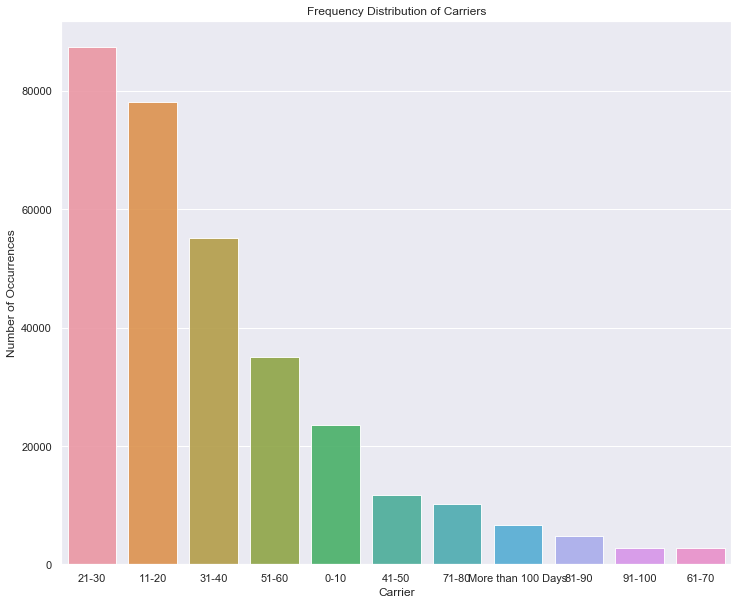

<Figure size 1440x576 with 0 Axes>

In [86]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Trying With XGBOOST 

In [21]:
!pip install xgboost

In [28]:
import xgboost

from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



feature_cols = train.columns.drop('Stay')

# Define the model
my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.15)

# Fit the model
my_model_3.fit(train[feature_cols], train['Stay'],
             early_stopping_rounds=5,
             eval_set=[(valid[feature_cols], valid['Stay'])],
             verbose=False) # Your code here

# Get predictions
#predictions_3 = my_model_3.predict(X_valid)

eval_score = accuracy_score(test['Stay'], my_model_3.predict(test[feature_cols]))

print('Eval ACC: {}'.format(eval_score))



ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Trying with Lightgbm

In [136]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter

feature_cols = train.columns.drop('Stay')

# dtrain = lgb.Dataset(train[feature_cols], label=train['Stay'])
# dvalid = lgb.Dataset(valid[feature_cols], label=valid['Stay'])

#param = {'num_leaves': 64, 'objective': 'multiclass'}
params = {}
params['learning_rate'] = 0.045
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}



clf = lgb.LGBMClassifier(**params)
clf.fit(train[feature_cols], train['Stay'], early_stopping_rounds=100, eval_set=[(valid[feature_cols], valid['Stay']),
        (test[feature_cols], test['Stay'])], eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(test['Stay'], clf.predict(test[feature_cols]))

print('Eval ACC: {}'.format(eval_score))



[1]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.87053	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.83743
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.85868	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.8278
[3]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.85077	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.8204
[4]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.83938	valid_1's multi_error: 0.739024	valid_1's multi_logloss: 1.81059
[5]	valid_0's multi_error: 0.745933	valid_0's multi_logloss: 1.82882	valid_1's multi_error: 0.738082	valid_1's multi_logloss: 1.80083
[6]	valid_0's multi_error: 0.743986	valid_0's multi_logloss: 1.81853	valid_1's multi_error: 0.736135	valid_1's multi_logloss: 1.79199
[7]	valid_0's multi_error: 0.738961	valid_0's multi_logloss: 1.80872	valid_1's multi_error: 0.732303	valid_1's multi_logloss: 1.78303
[8

[62]	valid_0's multi_error: 0.609258	valid_0's multi_logloss: 1.61633	valid_1's multi_error: 0.618052	valid_1's multi_logloss: 1.60633
[63]	valid_0's multi_error: 0.609133	valid_0's multi_logloss: 1.61492	valid_1's multi_error: 0.618366	valid_1's multi_logloss: 1.60494
[64]	valid_0's multi_error: 0.608567	valid_0's multi_logloss: 1.61369	valid_1's multi_error: 0.618554	valid_1's multi_logloss: 1.60377
[65]	valid_0's multi_error: 0.608253	valid_0's multi_logloss: 1.61207	valid_1's multi_error: 0.61868	valid_1's multi_logloss: 1.60223
[66]	valid_0's multi_error: 0.608379	valid_0's multi_logloss: 1.61093	valid_1's multi_error: 0.618303	valid_1's multi_logloss: 1.60122
[67]	valid_0's multi_error: 0.608881	valid_0's multi_logloss: 1.61007	valid_1's multi_error: 0.617989	valid_1's multi_logloss: 1.60044
[68]	valid_0's multi_error: 0.609133	valid_0's multi_logloss: 1.60909	valid_1's multi_error: 0.617926	valid_1's multi_logloss: 1.59953
[69]	valid_0's multi_error: 0.609133	valid_0's multi_log

[123]	valid_0's multi_error: 0.606369	valid_0's multi_logloss: 1.57351	valid_1's multi_error: 0.61265	valid_1's multi_logloss: 1.56428
[124]	valid_0's multi_error: 0.606055	valid_0's multi_logloss: 1.57312	valid_1's multi_error: 0.612336	valid_1's multi_logloss: 1.56389
[125]	valid_0's multi_error: 0.605929	valid_0's multi_logloss: 1.57274	valid_1's multi_error: 0.612085	valid_1's multi_logloss: 1.56354
[126]	valid_0's multi_error: 0.605866	valid_0's multi_logloss: 1.57235	valid_1's multi_error: 0.612399	valid_1's multi_logloss: 1.56316
[127]	valid_0's multi_error: 0.605615	valid_0's multi_logloss: 1.57199	valid_1's multi_error: 0.612085	valid_1's multi_logloss: 1.56286
[128]	valid_0's multi_error: 0.605301	valid_0's multi_logloss: 1.5717	valid_1's multi_error: 0.611771	valid_1's multi_logloss: 1.56253
[129]	valid_0's multi_error: 0.605741	valid_0's multi_logloss: 1.57146	valid_1's multi_error: 0.612147	valid_1's multi_logloss: 1.56225
[130]	valid_0's multi_error: 0.605741	valid_0's mu

[184]	valid_0's multi_error: 0.601344	valid_0's multi_logloss: 1.55895	valid_1's multi_error: 0.609572	valid_1's multi_logloss: 1.54955
[185]	valid_0's multi_error: 0.601407	valid_0's multi_logloss: 1.55878	valid_1's multi_error: 0.609572	valid_1's multi_logloss: 1.5494
[186]	valid_0's multi_error: 0.601281	valid_0's multi_logloss: 1.55865	valid_1's multi_error: 0.609509	valid_1's multi_logloss: 1.54928
[187]	valid_0's multi_error: 0.601281	valid_0's multi_logloss: 1.5585	valid_1's multi_error: 0.609384	valid_1's multi_logloss: 1.54917
[188]	valid_0's multi_error: 0.600967	valid_0's multi_logloss: 1.55837	valid_1's multi_error: 0.609447	valid_1's multi_logloss: 1.54903
[189]	valid_0's multi_error: 0.601156	valid_0's multi_logloss: 1.55817	valid_1's multi_error: 0.60907	valid_1's multi_logloss: 1.54888
[190]	valid_0's multi_error: 0.601093	valid_0's multi_logloss: 1.55806	valid_1's multi_error: 0.60907	valid_1's multi_logloss: 1.54875
[191]	valid_0's multi_error: 0.601344	valid_0's mult

[245]	valid_0's multi_error: 0.600214	valid_0's multi_logloss: 1.55182	valid_1's multi_error: 0.607248	valid_1's multi_logloss: 1.5426
[246]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.5517	valid_1's multi_error: 0.607311	valid_1's multi_logloss: 1.54252
[247]	valid_0's multi_error: 0.599648	valid_0's multi_logloss: 1.55162	valid_1's multi_error: 0.607185	valid_1's multi_logloss: 1.54245
[248]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.55148	valid_1's multi_error: 0.607123	valid_1's multi_logloss: 1.54237
[249]	valid_0's multi_error: 0.599648	valid_0's multi_logloss: 1.55143	valid_1's multi_error: 0.606997	valid_1's multi_logloss: 1.5423
[250]	valid_0's multi_error: 0.599774	valid_0's multi_logloss: 1.55142	valid_1's multi_error: 0.606871	valid_1's multi_logloss: 1.54228
[251]	valid_0's multi_error: 0.599523	valid_0's multi_logloss: 1.55131	valid_1's multi_error: 0.606997	valid_1's multi_logloss: 1.54216
[252]	valid_0's multi_error: 0.599334	valid_0's mul

[306]	valid_0's multi_error: 0.59858	valid_0's multi_logloss: 1.54777	valid_1's multi_error: 0.604233	valid_1's multi_logloss: 1.53884
[307]	valid_0's multi_error: 0.598518	valid_0's multi_logloss: 1.54771	valid_1's multi_error: 0.604296	valid_1's multi_logloss: 1.53879
[308]	valid_0's multi_error: 0.598769	valid_0's multi_logloss: 1.54763	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53873
[309]	valid_0's multi_error: 0.598643	valid_0's multi_logloss: 1.54759	valid_1's multi_error: 0.604422	valid_1's multi_logloss: 1.53872
[310]	valid_0's multi_error: 0.59858	valid_0's multi_logloss: 1.54754	valid_1's multi_error: 0.604233	valid_1's multi_logloss: 1.53865
[311]	valid_0's multi_error: 0.59858	valid_0's multi_logloss: 1.54746	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53861
[312]	valid_0's multi_error: 0.598643	valid_0's multi_logloss: 1.54741	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53859
[313]	valid_0's multi_error: 0.59858	valid_0's mult

[367]	valid_0's multi_error: 0.597764	valid_0's multi_logloss: 1.54513	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.53664
[368]	valid_0's multi_error: 0.597952	valid_0's multi_logloss: 1.54511	valid_1's multi_error: 0.604233	valid_1's multi_logloss: 1.53662
[369]	valid_0's multi_error: 0.59789	valid_0's multi_logloss: 1.54509	valid_1's multi_error: 0.604045	valid_1's multi_logloss: 1.5366
[370]	valid_0's multi_error: 0.597764	valid_0's multi_logloss: 1.54504	valid_1's multi_error: 0.604045	valid_1's multi_logloss: 1.53655
[371]	valid_0's multi_error: 0.59789	valid_0's multi_logloss: 1.54503	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53655
[372]	valid_0's multi_error: 0.597952	valid_0's multi_logloss: 1.54503	valid_1's multi_error: 0.604233	valid_1's multi_logloss: 1.53654
[373]	valid_0's multi_error: 0.597827	valid_0's multi_logloss: 1.545	valid_1's multi_error: 0.604485	valid_1's multi_logloss: 1.53648
[374]	valid_0's multi_error: 0.597638	valid_0's multi

[429]	valid_0's multi_error: 0.59701	valid_0's multi_logloss: 1.54364	valid_1's multi_error: 0.604108	valid_1's multi_logloss: 1.53543
[430]	valid_0's multi_error: 0.597261	valid_0's multi_logloss: 1.54359	valid_1's multi_error: 0.604108	valid_1's multi_logloss: 1.5354
[431]	valid_0's multi_error: 0.597199	valid_0's multi_logloss: 1.54359	valid_1's multi_error: 0.604045	valid_1's multi_logloss: 1.53539
[432]	valid_0's multi_error: 0.597136	valid_0's multi_logloss: 1.54357	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.53537
[433]	valid_0's multi_error: 0.596696	valid_0's multi_logloss: 1.54355	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.53533
[434]	valid_0's multi_error: 0.596759	valid_0's multi_logloss: 1.54353	valid_1's multi_error: 0.603919	valid_1's multi_logloss: 1.5353
[435]	valid_0's multi_error: 0.596885	valid_0's multi_logloss: 1.5435	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.53532
[436]	valid_0's multi_error: 0.596885	valid_0's mult

[490]	valid_0's multi_error: 0.596822	valid_0's multi_logloss: 1.54254	valid_1's multi_error: 0.604171	valid_1's multi_logloss: 1.53464
[491]	valid_0's multi_error: 0.596508	valid_0's multi_logloss: 1.54253	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53461
[492]	valid_0's multi_error: 0.596571	valid_0's multi_logloss: 1.54253	valid_1's multi_error: 0.604296	valid_1's multi_logloss: 1.53459
[493]	valid_0's multi_error: 0.596633	valid_0's multi_logloss: 1.54252	valid_1's multi_error: 0.604485	valid_1's multi_logloss: 1.53458
[494]	valid_0's multi_error: 0.596445	valid_0's multi_logloss: 1.54249	valid_1's multi_error: 0.604359	valid_1's multi_logloss: 1.53457
[495]	valid_0's multi_error: 0.596445	valid_0's multi_logloss: 1.54248	valid_1's multi_error: 0.604108	valid_1's multi_logloss: 1.53457
[496]	valid_0's multi_error: 0.596382	valid_0's multi_logloss: 1.54246	valid_1's multi_error: 0.604296	valid_1's multi_logloss: 1.53458
[497]	valid_0's multi_error: 0.596445	valid_0's 

In [137]:

preds = clf.predict(test_data_transformed[feature_cols])

Counter(train['Stay'])

Counter({0: 20045,
         4: 10481,
         3: 50319,
         1: 68724,
         5: 32434,
         2: 79312,
         7: 9490,
         10: 6172,
         8: 4524,
         6: 2496,
         9: 2599})

In [105]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)


clf = lgb.LGBMClassifier(**params)

clf.fit(train_data_transformed[feature_cols], train_data_transformed['Stay'], eval_metric='multi_error', verbose=False)

# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(train_data_transformed['Stay'], clf.predict(train_data_transformed[feature_cols]))

print('ACC: {}'.format(eval_score_acc))

{'learning_rate': 0.047, 'max_depth': 18, 'n_estimators': 523, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.7, 'random_state': 42, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.7, 'reg_lambda': 1.11}
ACC: 0.4429182446818533


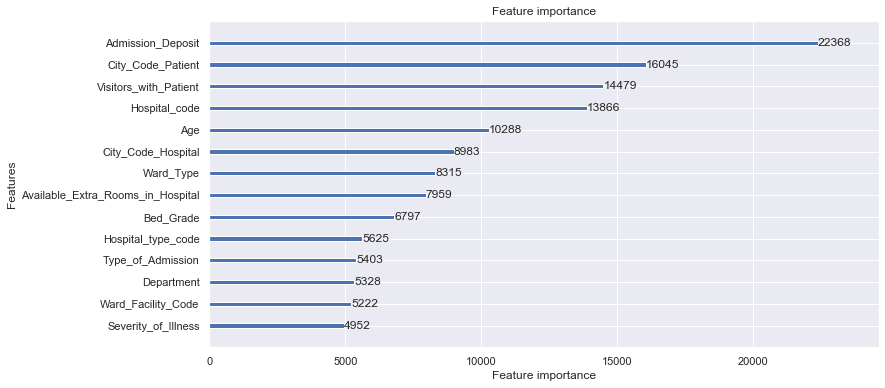

In [138]:
preds = clf.predict(test_data_transformed[feature_cols])

Counter(preds)
submission = pd.DataFrame({'case_id':test_data['case_id'], 'Stay':preds})


plt.rcParams['figure.figsize'] = (12, 6)
lgb.plot_importance(clf)
plt.show()

In [139]:
print(train_data['Stay'].unique())
print(submission['Stay'].unique())

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
[ 0  5  2  3  1  7 10  8  9  4]


In [140]:
submission

#"0": '0-10, "1": "11-20", "2": "21-30", "3": "31-40", "4": "41-50", "5": "51-60", "6": "61-70" , "7": "71-80", "8": "81-90", "9": "91-100", "10": "More than 100 Days"

submission["Stay"].replace({0: "0-10", 1: "11-20", 2: "21-30", 3: "31-40", 4: "41-50", 5: "51-60", 6: "61-70" , 7: "71-80", 8: "81-90", 9: "91-100", 10: "More than 100 Days"}, inplace=True)



In [141]:
submission.to_csv('submission.csv', index=False)

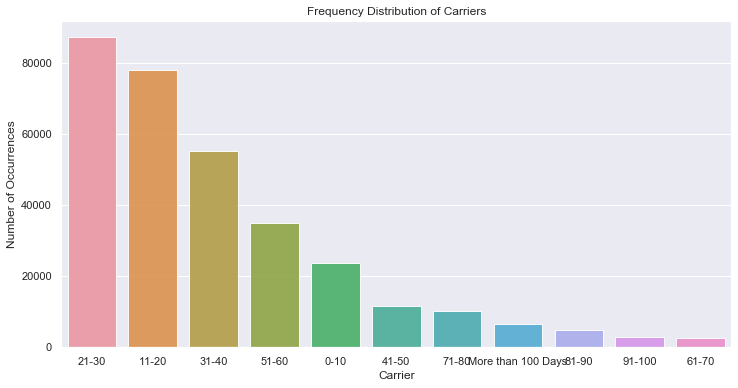

<Figure size 1440x576 with 0 Axes>

In [142]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

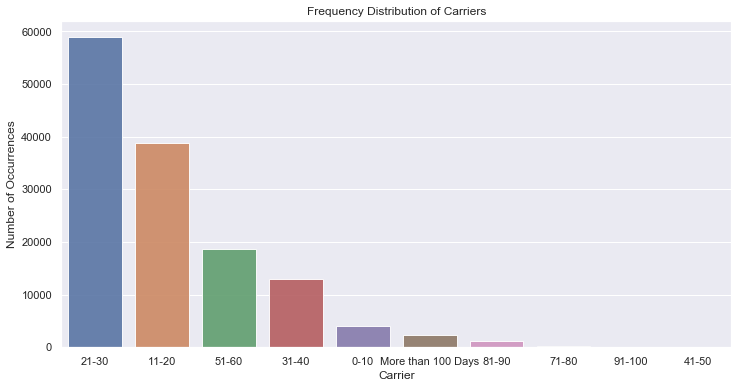

<Figure size 1440x576 with 0 Axes>

In [143]:
carrier_count = submission['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Trying with XGBOOST